<a href="https://colab.research.google.com/github/ranggawpp/Tugas-Akhir/blob/main/Tugas_Akhir_Siang_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset


In [ ]:
# Menghubungkan Drive dengan Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset sebagai dataframe
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Tugas Akhir/Data_Siang_Processed.xlsx', index_col='Tanggal', parse_dates=True)

# Melihat sampel teratas dataframe
df

,No,Bulan,Sudut,Lux,Cuaca,Tampak
Tanggal,,,,,,
2023-03-01,1,March,0,605.0,Hujan,Utara
2023-03-01,2,March,15,1166.0,Hujan,Utara
2023-03-01,3,March,30,1727.0,Hujan,Utara
2023-03-01,4,March,45,2288.0,Hujan,Utara
2023-03-01,5,March,60,2848.0,Hujan,Utara
...,...,...,...,...,...,...
2024-02-29,4754,February,120,2922.0,Hujan,Utara
2024-02-29,4755,February,135,2542.0,Hujan,Utara
2024-02-29,4756,February,150,2162.0,Hujan,Utara


# Exploratory Data Analysis
### 1. Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4758 entries, 2023-03-01 to 2024-02-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      4758 non-null   int64  
 1   Bulan   4758 non-null   object 
 2   Sudut   4758 non-null   int64  
 3   Lux     4056 non-null   float64
 4   Cuaca   4758 non-null   object 
 5   Tampak  4758 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 260.2+ KB


### 2. Deskripsi Statistik

In [ ]:
df.describe()

,No,Sudut,Lux
count,4758.00000,4758.00000,4056.000000
mean,2379.50000,90.00000,35229.498521
std,1373.66062,56.13076,27447.235479
min,1.00000,0.00000,203.000000
25%,1190.25000,45.00000,15775.000000
50%,2379.50000,90.00000,28595.500000
75%,3568.75000,135.00000,51325.500000
max,4758.00000,180.00000,155000.000000


In [ ]:
deskripsi_per_sudut = df.groupby('Sudut')['Lux'].describe()
deskripsi_per_sudut

,count,mean,std,min,25%,50%,75%,max
Sudut,,,,,,,,
0,312.0,19746.701923,12852.475076,203.0,14311.25,18944.0,25571.00,75420.0
15,312.0,29987.810897,19816.058317,364.0,17804.75,29987.5,40014.00,95460.0
30,312.0,37373.032051,24358.462737,499.0,20159.25,37579.5,52655.50,115900.0
45,312.0,43701.080128,29815.289307,635.0,20124.50,40759.5,67860.00,130800.0
60,312.0,49789.291667,33101.582762,771.0,22162.75,50127.5,76296.25,135700.0
75,312.0,49794.064103,34947.450620,706.0,21100.50,45046.0,78690.00,151700.0
90,312.0,46714.253205,33904.516128,613.0,19620.25,41105.0,71950.25,155000.0
105,312.0,44608.560897,30480.907237,659.0,20244.25,41131.0,67929.25,129100.0
120,312.0,40625.000000,26721.729123,590.0,21277.00,40182.0,59195.00,113600.0


In [ ]:
# Mengambil subset 60 derajat
df75 = df.query('Sudut == 75')
df75

,No,Bulan,Sudut,Lux,Cuaca,Tampak
Tanggal,,,,,,
2023-03-01,6,March,75,3409.0,Hujan,Utara
2023-03-02,19,March,75,3412.0,Hujan,Utara
2023-03-03,32,March,75,27230.0,Mendung,Utara
2023-03-04,45,March,75,NaN,Berawan,Utara
2023-03-05,58,March,75,4193.0,Hujan,Utara
...,...,...,...,...,...,...
2024-02-25,4699,February,75,26761.0,Berawan,Utara
2024-02-26,4712,February,75,43650.0,Berawan,Utara
2024-02-27,4725,February,75,40102.0,Cerah Berawan,Utara


In [ ]:
df75.describe()

,No,Sudut,Lux
count,366.000000,366.0,312.000000
mean,2378.500000,75.0,49794.064103
std,1375.391399,0.0,34947.450620
min,6.000000,75.0,706.000000
25%,1192.250000,75.0,21100.500000
50%,2378.500000,75.0,45046.000000
75%,3564.750000,75.0,78690.000000
max,4751.000000,75.0,151700.000000


### 3. Missing Value dan Outlier

In [ ]:
# Check for missing values in each DataFrame
print(df75[df75.isnull().any(axis=1)], '\n')
print(df75.isnull().sum())

              No      Bulan  Sudut  Lux          Cuaca Tampak
Tanggal                                                      
2023-03-04    45      March     75  NaN        Berawan  Utara
2023-03-23   292      March     75  NaN  Cerah Berawan  Utara
2023-03-25   318      March     75  NaN        Berawan  Utara
2023-04-09   513      April     75  NaN  Cerah Berawan  Utara
2023-04-18   630      April     75  NaN  Cerah Berawan  Utara
2023-04-22   682      April     75  NaN          Cerah  Utara
2023-05-01   799        May     75  NaN  Cerah Berawan  Utara
2023-05-23  1085        May     75  NaN  Cerah Berawan  Utara
2023-06-17  1410       June     75  NaN  Cerah Berawan  Utara
2023-06-18  1423       June     75  NaN        Berawan  Utara
2023-06-30  1579       June     75  NaN  Cerah Berawan  Utara
2023-07-08  1683       July     75  NaN  Cerah Berawan  Utara
2023-07-15  1774       July     75  NaN  Cerah Berawan  Utara
2023-07-16  1787       July     75  NaN  Cerah Berawan  Utara
2023-07-

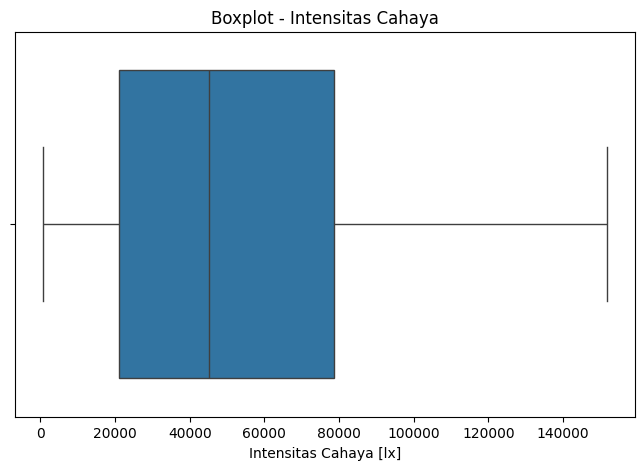

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=df75, x='Lux')
plt.xlabel('Intensitas Cahaya [lx]')
plt.title(f'Boxplot - Intensitas Cahaya');

### 4. Boxplot Distribusi

### 4.1 Day month distribution

Text(0.5, 0, 'Tahun-Bulan')

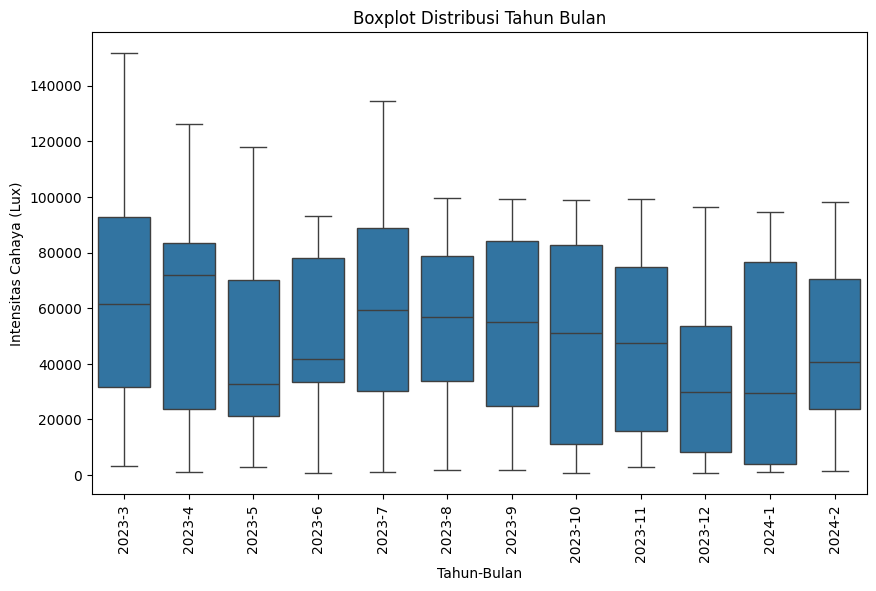

In [ ]:
#df75.index = pd.to_datetime(df75.index)
data = df75.copy()
data['year'] = [x for x in data.index.year]
data['month'] = [x for x in data.index.month]
data['year_month'] = [str(x.year) + '-' + str(x.month) for x in data.index]

data_plot = data[data['year'] >= 2023].reset_index().sort_values(by='Tanggal').set_index('Tanggal')
# Create a dictionary to map month numbers to month names
month_mapping = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

# Apply the mapping to create the 'month_year' column
data['month_year'] = data['year_month'].apply(lambda x: f"{month_mapping[int(x.split('-')[1])]} {x.split('-')[0]}")

# Now you can use 'month_year' in your plotting
plt.figure(figsize=(10, 6))
plt.title(f'Boxplot Distribusi Tahun Bulan')
plt.xticks(rotation=90)

sns.boxplot(x='month_year', y='Lux', data=data_plot) # Assuming data_plot is defined
plt.ylabel('Intensitas Cahaya (Lux)')
plt.xlabel('Bulan Tahun')

### 4.2 Day distribution

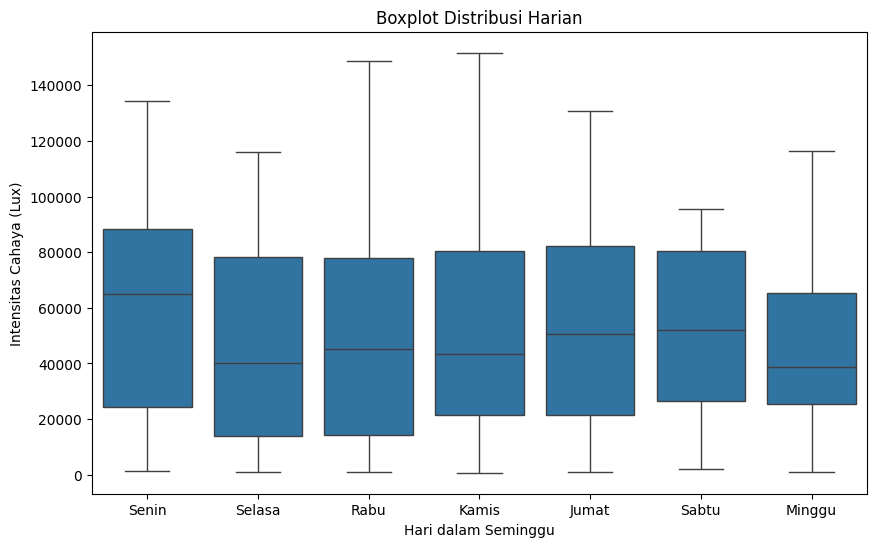

In [ ]:
# 1. Extract day of the week:
data['day_of_week'] = data.index.dayofweek  # 0: Monday, 1: Tuesday, ..., 6: Sunday
data['day_str'] = data.index.strftime('%A')  # Full day name: Monday, Tuesday, ...

# 2. Sort by day of the week (for better visualization):
data_sorted = data.sort_values(by=['day_of_week'])

# Mapping day names to Indonesian
day_mapping = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

# Apply the mapping to the 'day_str' column
data_sorted['day_str_id'] = data_sorted['day_str'].map(day_mapping)

# 3. Create the boxplot with Indonesian day names:
plt.figure(figsize=(10, 6))
plt.title('Boxplot Distribusi Harian')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Intensitas Cahaya (Lux)')

sns.boxplot(x='day_str_id', y='Lux', data=data_sorted)  # Use 'day_str_id'

plt.show()

In [ ]:
df75

,No,Bulan,Sudut,Lux,Cuaca,Tampak
Tanggal,,,,,,
2023-03-01,6,March,75,3409.0,Hujan,Utara
2023-03-02,19,March,75,3412.0,Hujan,Utara
2023-03-03,32,March,75,27230.0,Mendung,Utara
2023-03-04,45,March,75,NaN,Berawan,Utara
2023-03-05,58,March,75,4193.0,Hujan,Utara
...,...,...,...,...,...,...
2024-02-25,4699,February,75,26761.0,Berawan,Utara
2024-02-26,4712,February,75,43650.0,Berawan,Utara
2024-02-27,4725,February,75,40102.0,Cerah Berawan,Utara


### 3. Data Preprocessing

#### 3.1 Handling Missing Value and Outlier

In [ ]:
import numpy as np
import pandas as pd

def fill_missing_lux(df):
    # Menghitung statistik untuk setiap kombinasi sudut, cuaca, dan bulan
    results = {}
    overall_results = {}

    for sudut in df['Sudut'].unique():
        for cuaca in df['Cuaca'].unique():
            overall_subset = df[(df['Sudut'] == sudut) & (df['Cuaca'] == cuaca)]
            overall_min_val = overall_subset['Lux'].min()
            overall_max_val = overall_subset['Lux'].max()

            overall_results[(sudut, cuaca)] = {
                'Min': overall_min_val,
                'Max': overall_max_val,
            }

            for bulan in df['Bulan'].unique():
                subset = overall_subset[overall_subset['Bulan'] == bulan]
                min_val = subset['Lux'].min()
                max_val = subset['Lux'].max()

                results[(sudut, cuaca, bulan)] = {
                    'Min': min_val,
                    'Max': max_val,
                }

    # Mengisi nilai Lux yang kosong
    for index, row in df.iterrows():
        if pd.isna(row['Lux']):
            sudut = row['Sudut']
            cuaca = row['Cuaca'].strip()
            bulan = row['Bulan']

            min_val = results.get((sudut, cuaca, bulan), {}).get('Min')
            max_val = results.get((sudut, cuaca, bulan), {}).get('Max')

            # Menggunakan nilai keseluruhan jika tidak ada nilai min atau max untuk bulan tertentu
            if pd.isna(min_val) or pd.isna(max_val) or min_val == max_val:
                min_val = overall_results.get((sudut, cuaca), {}).get('Min')
                max_val = overall_results.get((sudut, cuaca), {}).get('Max')

            if pd.notna(min_val) and pd.notna(max_val):
                df.at[index, 'Lux'] = np.random.randint(min_val, max_val + 1)

    return df

In [ ]:
df75 = fill_missing_lux(df75)

In [ ]:
# Check for missing values in each DataFrame
print(df75[df75.isnull().any(axis=1)], '\n')
print(df75.isnull().sum())

Empty DataFrame
Columns: [No, Bulan, Sudut, Lux, Cuaca, Tampak]
Index: [] 

No        0
Bulan     0
Sudut     0
Lux       0
Cuaca     0
Tampak    0
dtype: int64


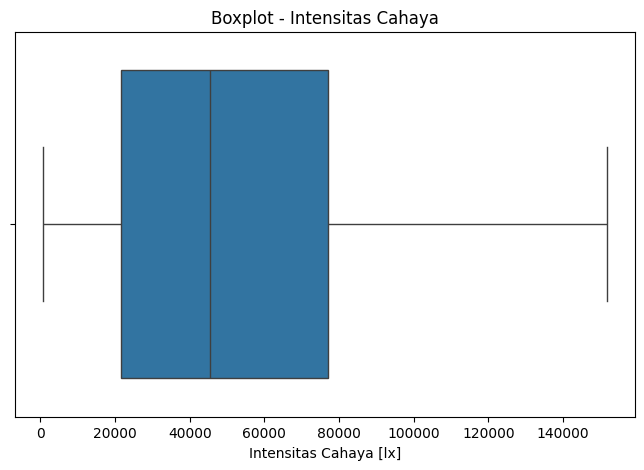

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df75, x='Lux')
plt.xlabel('Intensitas Cahaya [lx]')
plt.title(f'Boxplot - Intensitas Cahaya');

In [ ]:
# Save the DataFrame to Google Drive as an Excel file
#df75.to_excel('/content/drive/MyDrive/Tugas Akhir/Data_Siang_Processed2.xlsx')


In [ ]:
df75.describe()

,No,Sudut,Lux
count,366.000000,366.0,366.000000
mean,2378.500000,75.0,49432.161202
std,1375.391399,0.0,33952.945465
min,6.000000,75.0,706.000000
25%,1192.250000,75.0,21666.000000
50%,2378.500000,75.0,45425.000000
75%,3564.750000,75.0,77036.000000
max,4751.000000,75.0,151700.000000


#### 3.2 Time Plot

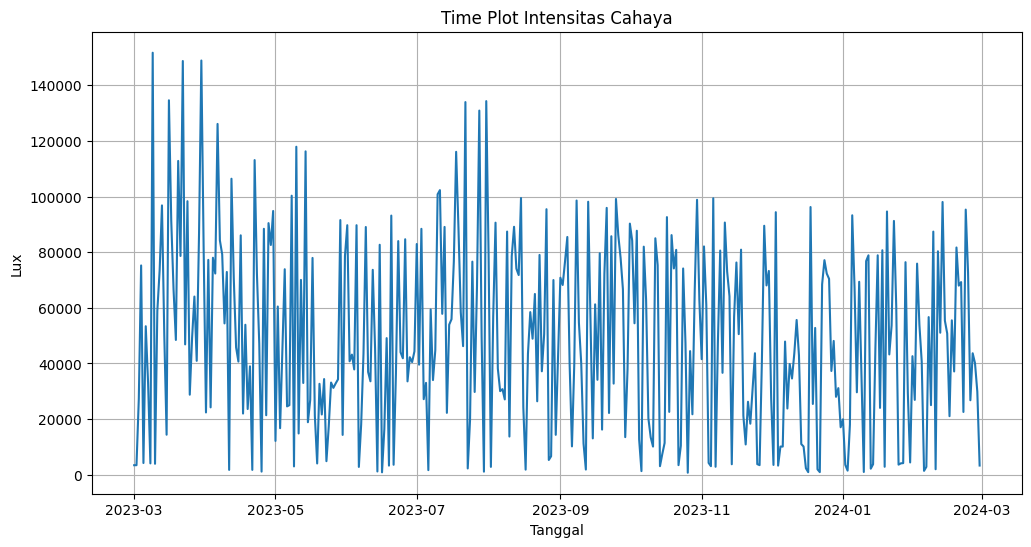

In [ ]:
# prompt: time plot Lux

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df75' is your DataFrame with 'Lux' and a datetime index
plt.figure(figsize=(12, 6))
plt.plot(df75.index, df75['Lux'])
plt.xlabel('Tanggal')
plt.ylabel('Lux')
plt.title('Time Plot Intensitas Cahaya')
plt.grid(True)
plt.show()

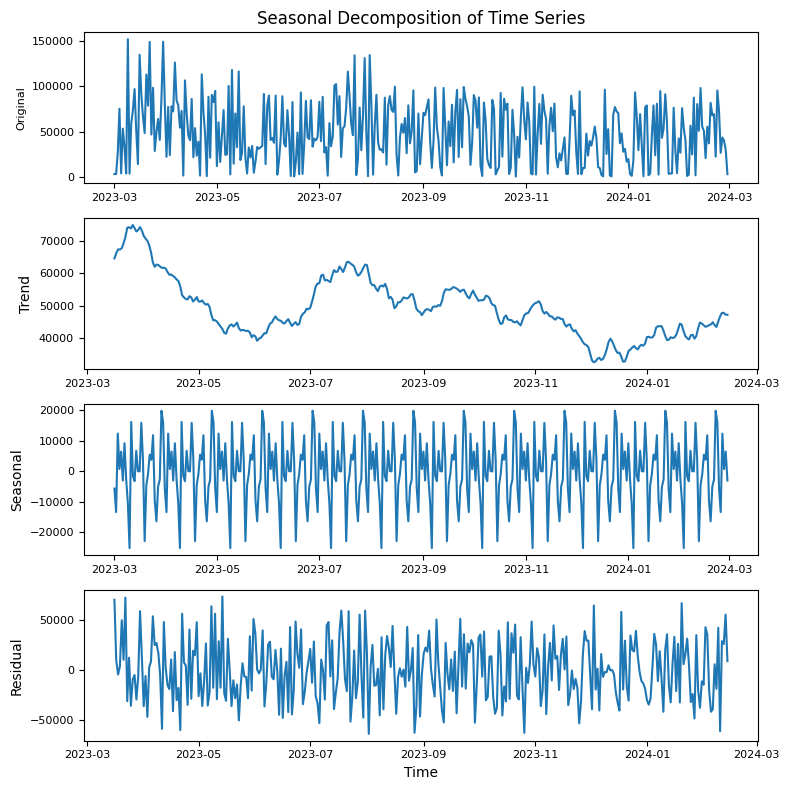

In [ ]:
# Assuming 'df75' is your DataFrame with 'Lux' and a datetime index
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df75['Lux'], model='additive', period=30)  # Adjust 'period' based on your data's seasonality

# Plot the decomposed components
# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))  # Adjust the figure size as per your preference

# Plot the original time series
ax1.plot(result.observed)
ax1.set_ylabel('Original', fontsize=8)  # Adjust y-axis label font size
ax1.set_title('Seasonal Decomposition of Time Series', fontsize=12)  # Adjust title font size

# Plot the trend component
ax2.plot(result.trend)
ax2.set_ylabel('Trend', fontsize=10)  # Adjust y-axis label font size

# Plot the seasonal component
ax3.plot(result.seasonal)
ax3.set_ylabel('Seasonal', fontsize=10)  # Adjust y-axis label font size

# Plot the residual component
ax4.plot(result.resid)
ax4.set_xlabel('Time', fontsize=10)  # Adjust x-axis label font size
ax4.set_ylabel('Residual', fontsize=10)  # Adjust y-axis label font size

# Adjust tick label font size for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout()  # Ensure all elements fit within the figure
plt.show()

#### 3.2 Lux to Solar Irradiation

In [ ]:
def lux_to_solar_irradiation(lux_value):
  """Converts Lux value to Solar Irradiation (W/m²)."""
  return round(lux_value / 122, 2)

In [ ]:
df75['SolarIrradiation'] = df75['Lux'].apply(lux_to_solar_irradiation)

<ipython-input-23-6a9f4138d501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df75['SolarIrradiation'] = df75['Lux'].apply(lux_to_solar_irradiation)


In [ ]:
df75 = df75.drop(['No', 'Bulan', 'Sudut', 'Tampak', 'Cuaca'], axis=1)
df75

,Lux,SolarIrradiation
Tanggal,,
2023-03-01,3409.0,27.94
2023-03-02,3412.0,27.97
2023-03-03,27230.0,223.20
2023-03-04,75225.0,616.60
2023-03-05,4193.0,34.37
...,...,...
2024-02-25,26761.0,219.35
2024-02-26,43650.0,357.79
2024-02-27,40102.0,328.70


Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the StandardScaler
scaler = MinMaxScaler()

df75['SolarIrradiation'] = scaler.fit_transform(df75[['SolarIrradiation']])

In [ ]:
df75['SolarIrradiation']

,SolarIrradiation
Tanggal,
2023-03-01,0.017897
2023-03-02,0.017921
2023-03-03,0.175664
2023-03-04,0.493524
2023-03-05,0.023092
...,...
2024-02-25,0.172553
2024-02-26,0.284410
2024-02-27,0.260906


Pembagian Data

In [ ]:
# 90% to Train, 10% to Test
train_size = int(len(df75) * .9)
test_size = len(df75) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 329 Test Size : 37


In [ ]:
data = df75[['SolarIrradiation']].values
train_data = data[:train_size, :]
test_data = data[train_size-7: , :]
train_data.shape

(329, 1)

Segmentasi Data

In [ ]:
# Creating a Training set with 7 time-steps
x_train = []
y_train = []

for i in range(7, len(train_data)):
    x_train.append(train_data[i-7:i, 0])
    y_train.append(train_data[i, 0])
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape, y_train.shape

((322, 7, 1), (322,))

In [ ]:
# Creating a Training set with 7 time-steps
x_test = []
y_test = []

for i in range(7, len(test_data)):
    x_test.append(test_data[i-7:i, 0])
    y_test.append(test_data[i, 0])
# Convert to numpy array
x_test, y_test = np.array(x_test), np.array(y_test)
# Reshaping the input to (n_samples, time_steps, n_feature)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape, y_test.shape

((37, 7, 1), (37,))

In [ ]:
# prompt: tampilkan panjang baris masing masing set

print("Panjang baris df:", len(df))
print("Panjang baris df75:", len(df75))
print("Panjang baris x_train:", len(x_train))
print("Panjang baris y_train:", len(y_train))
print("Panjang baris x_test:", len(x_test))
print("Panjang baris y_test:", len(y_test))


Panjang baris df: 4758
Panjang baris df75: 366
Panjang baris x_train: 322
Panjang baris y_train: 322
Panjang baris x_test: 37
Panjang baris y_test: 37


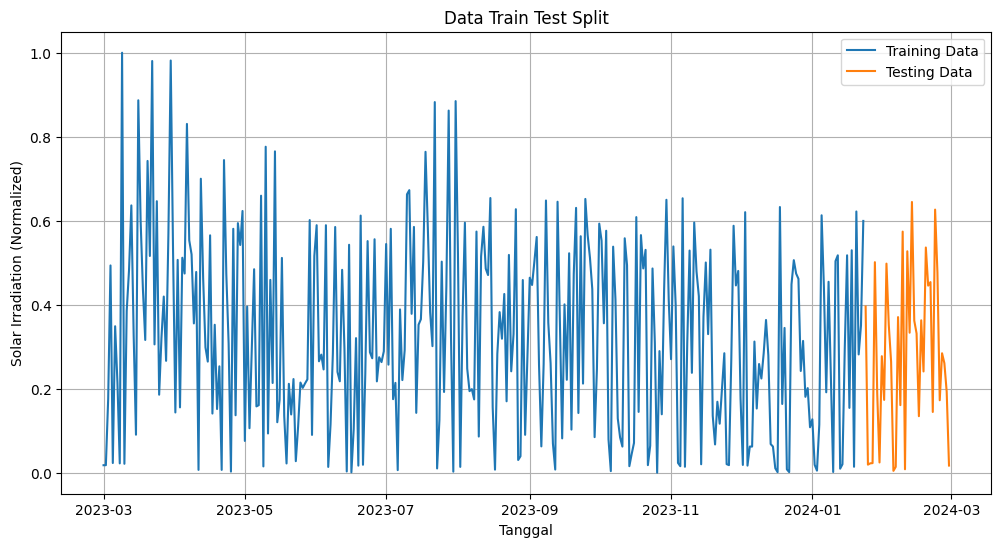

In [ ]:
# 90% to Train, 10% to Test
train_data = df75[:train_size]
test_data = df75[train_size:]

# Visualisasi pembagian data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['SolarIrradiation'], label='Training Data')
plt.plot(test_data.index, test_data['SolarIrradiation'], label='Testing Data')
plt.xlabel('Tanggal')
plt.ylabel('Solar Irradiation (Normalized)')
plt.title('Data Train Test Split')
plt.legend()
plt.grid(True)
plt.show()

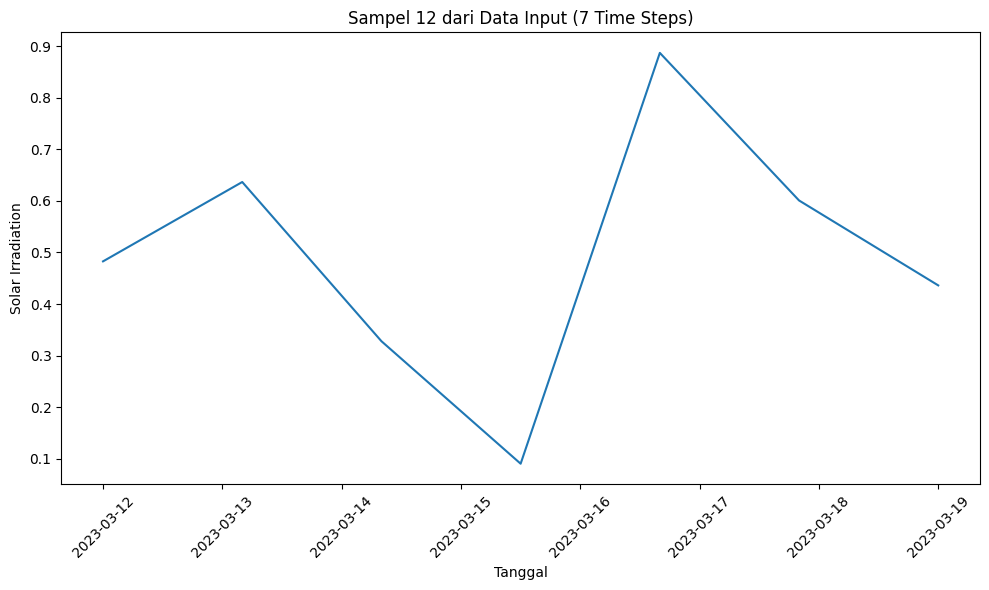

In [ ]:
# prompt: plot satu sampel dari train namun label x nya menunjukkan tanggalnya

# Plot satu sampel dari x_train dengan label x menunjukkan tanggal
sample_index = 11  # Ganti dengan indeks sampel yang ingin diplot

# Dapatkan tanggal-tanggal yang sesuai dengan sampel
start_date = df75.index[7 + sample_index - 7]  # 7 adalah jumlah time step
end_date = df75.index[7 + sample_index]
dates = pd.date_range(start=start_date, end=end_date, periods=7)

plt.figure(figsize=(10, 6))
plt.plot(dates, x_train[sample_index])
plt.xlabel('Tanggal')
plt.ylabel('Solar Irradiation')
plt.title(f'Sampel {sample_index + 1} dari Data Input (7 Time Steps)')
plt.xticks(rotation=45)  # Rotasi label tanggal agar lebih mudah dibaca
plt.tight_layout() # Menyesuaikan tata letak agar label tidak terpotong
plt.show()


Implementasi Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def train_model(optimizer, name, batch, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    """Melatih model yang sudah dibangun."""
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
        LSTM(64, return_sequences=True),
        LSTM(32, return_sequences=False),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1)
    ])

    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=["mae"])

    # Callbacks
    model_checkpoint = ModelCheckpoint(
        filepath=f'/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/best_{name}.keras',
        monitor='mae',
        save_best_only=True,
        mode='min'
    )

    # Training
    history = model.fit(
        x_train, y_train,
        epochs=50,
        verbose=0,
        batch_size=batch,
        validation_data=(x_test, y_test),
        callbacks=[model_checkpoint]
    )

    # Simpan model akhir setelah training selesai
    model.save(f'/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_{name}.keras')

    return model, history

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def plot_train_history(histories, batch_sizes, name):
    # Membuat figure dengan ukuran yang diinginkan
    fig = plt.figure(figsize=(15, 7))

    # Menambahkan judul utama (suptitle)
    fig.suptitle(f'Train History {name}', fontsize=16)
    fig.supxlabel('Epoch', fontsize=12)

    # Menggunakan GridSpec untuk mengatur layout subplot secara seimbang
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    # Subplot pertama untuk Loss
    ax0 = plt.subplot(gs[0])
    for i, history in enumerate(histories):
        ax0.plot(history.history['loss'], label=f'Batch-{batch_sizes[i]}')
    ax0.set_title('Loss')
    ax0.grid(True)

    # Subplot kedua untuk MAE
    ax1 = plt.subplot(gs[1])
    for i, history in enumerate(histories):
        ax1.plot(history.history['mae'], label=f'Batch-{batch_sizes[i]}')
    ax1.set_title('MAE')
    ax1.legend()
    ax1.grid(True)

    # Menyesuaikan layout agar tidak terjadi overlapping antar komponen
    plt.tight_layout()  # Sisakan ruang untuk judul utama
    plt.show()

In [ ]:
adam1_model, adam1 = train_model(tf.keras.optimizers.Adam(), "adam_1", 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
adam1_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 7, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,957 (1.49 MB)

 Trainable params: 129,985 (507.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 259,972 (1015.52 KB)

In [ ]:
adam2_model, adam2 = train_model(tf.keras.optimizers.Adam(), "adam_2", 4)

In [ ]:
adam3_model, adam3 = train_model(tf.keras.optimizers.Adam(), "adam_3", 8)

In [ ]:
adam4_model, adam4 = train_model(tf.keras.optimizers.Adam(), "adam_4", 16)

In [ ]:
adam5_model, adam5 = train_model(tf.keras.optimizers.Adam(), "adam_5", 32)

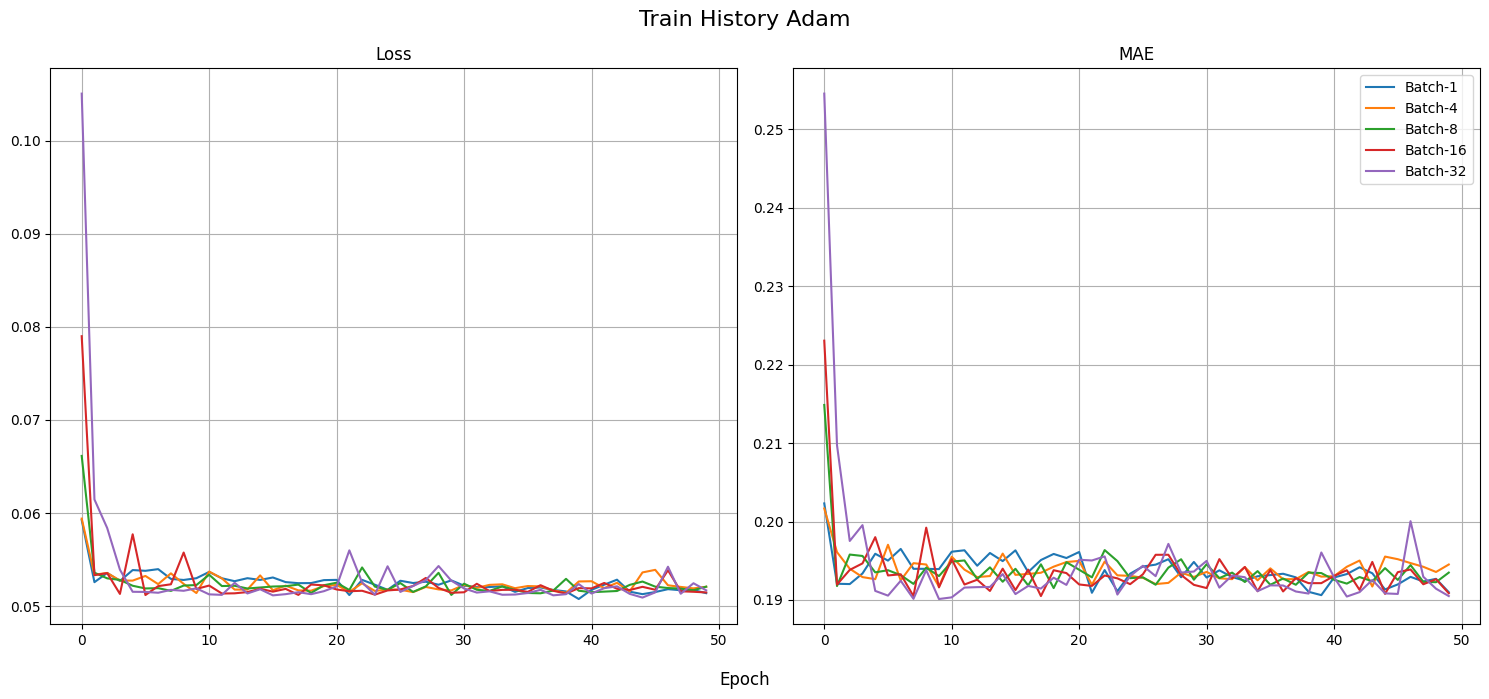

In [ ]:
batch_sizes = [1, 4, 8, 16, 32]
histories = [adam1, adam2, adam3, adam4, adam5]
plot_train_history(histories, batch_sizes, "Adam")

In [ ]:
sgd1_model, sgd1 = train_model(tf.keras.optimizers.SGD(), "sgd_1", 1)

In [ ]:
sgd1_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 7, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_62 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,987 (507.77 KB)

 Trainable params: 129,985 (507.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
sgd2_model, sgd2 = train_model(tf.keras.optimizers.SGD(), "sgd_2", 4)

In [ ]:
sgd3_model, sgd3 = train_model(tf.keras.optimizers.SGD(), "sgd_3", 8)

In [ ]:
sgd4_model, sgd4 = train_model(tf.keras.optimizers.SGD(), "sgd_4", 16)

In [ ]:
sgd5_model, sgd5 = train_model(tf.keras.optimizers.SGD(), "sgd_5", 32)

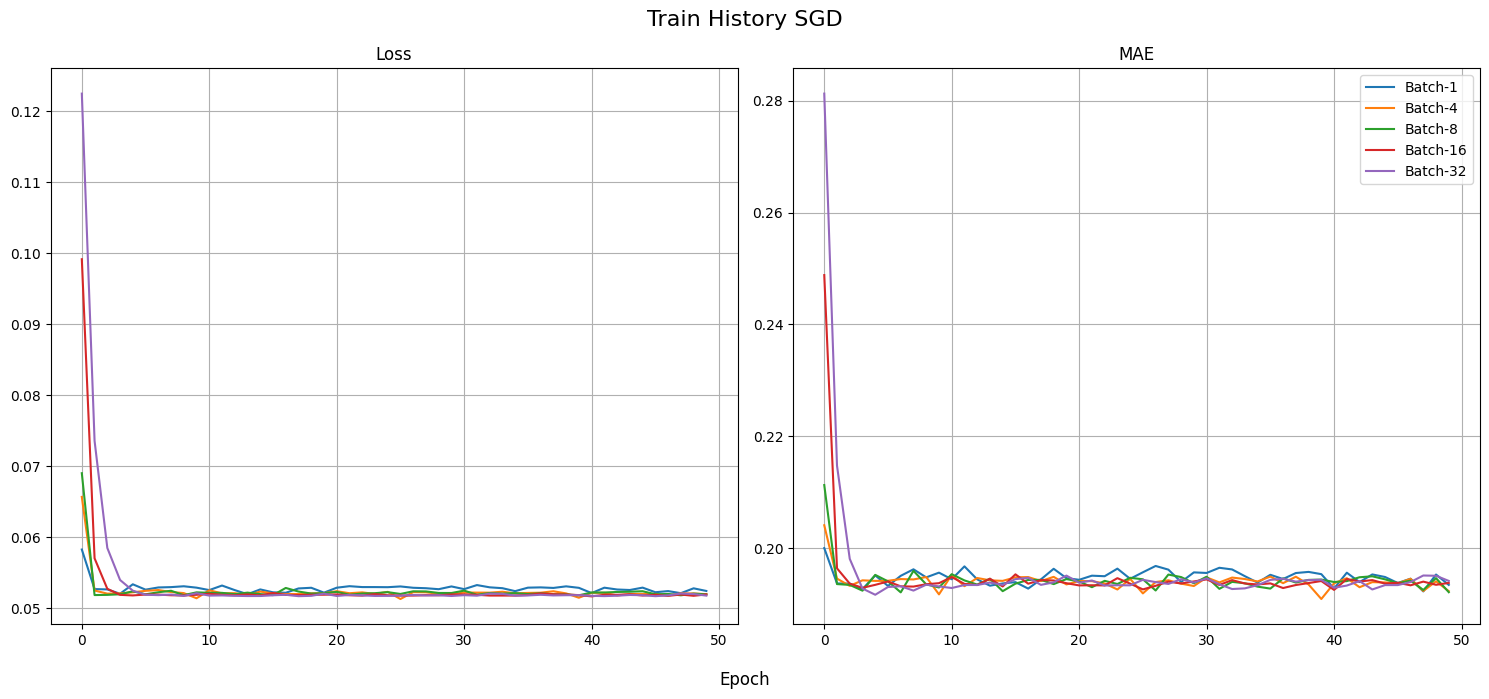

In [ ]:
histories = [sgd1, sgd2, sgd3, sgd4, sgd5]
plot_train_history(histories, batch_sizes, 'SGD')

In [ ]:
rms1_model, rms1 = train_model(tf.keras.optimizers.RMSprop(), "rms_1", 1)

In [ ]:
rms1_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_75 (LSTM)                  │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_76 (LSTM)                  │ (None, 7, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_77 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,972 (1015.52 KB)

 Trainable params: 129,985 (507.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 129,987 (507.77 KB)

In [ ]:
rms2_model, rms2 = train_model(tf.keras.optimizers.RMSprop(), "rms_2", 4)

In [ ]:
rms3_model, rms3 = train_model(tf.keras.optimizers.RMSprop(), "rms_3", 8)

In [ ]:
rms4_model, rms4 = train_model(tf.keras.optimizers.RMSprop(), "rms_4", 16)

In [ ]:
rms5_model, rms5 = train_model(tf.keras.optimizers.RMSprop(), "rms_5", 32)

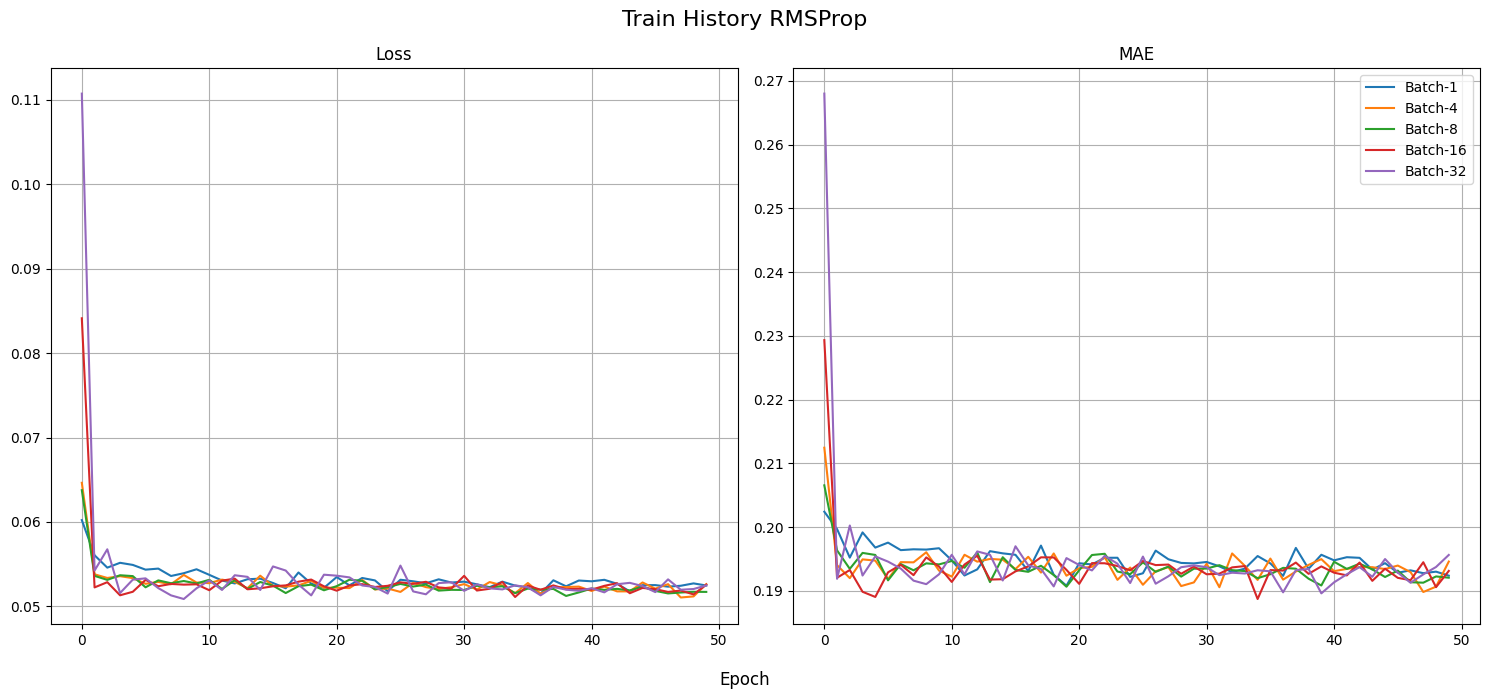

In [ ]:
histories = [rms1, rms2, rms3, rms4, rms5]
plot_train_history(histories, batch_sizes, 'RMSProp')

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mean_actual = np.mean(np.abs(y_true))  # Rata-rata absolut nilai aktual
    return (mae / mean_actual) * 100 if mean_actual != 0 else np.nan  # Hindari pembagian nol


def predict_and_plot(model_paths, x_test, y_test, scaler, title="Predictions vs. Actual Solar Irradiation"):
    predictions = {}
    mae_scores = {}
    rmse_scores = {}
    mape_scores = {}

    # Load models and make predictions
    for name, path in model_paths.items():
        model = tf.keras.models.load_model(path)
        y_pred = model.predict(x_test)
        predictions[name] = scaler.inverse_transform(y_pred).flatten()

    # Inverse transform y_test
    y_test_original = scaler.inverse_transform([y_test]).flatten()

    # Calculate metrics
    for name, preds in predictions.items():
        mae_scores[name] = mean_absolute_error(y_test_original, preds)
        rmse_scores[name] = np.sqrt(mean_squared_error(y_test_original, preds))
        mape_scores[name] = mean_absolute_percentage_error(y_test_original, preds)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_original, label='Actual', linewidth=2)
    for name, preds in predictions.items():
        plt.plot(preds, label=f'{name} Predictions')

    plt.xlabel('Time Steps')
    plt.ylabel('Solar Irradiation (W/m²)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot MAE, RMSE, and MAPE
    model_names = list(model_paths.keys())
    mae_values = [mae_scores[name] for name in model_names]
    rmse_values = [rmse_scores[name] for name in model_names]
    mape_values = [mape_scores[name] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.3

    plt.figure(figsize=(12, 6))
    bars1 = plt.bar(x - width, mae_values, width, label='MAE')
    bars2 = plt.bar(x, rmse_values, width, label='RMSE')
    bars3 = plt.bar(x + width, mape_values, width, label='MAPE')

    # Add highest value labels
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model MAE, RMSE, and MAPE')
    plt.xticks(x, model_names)
    plt.legend()
    plt.grid(axis='y')
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


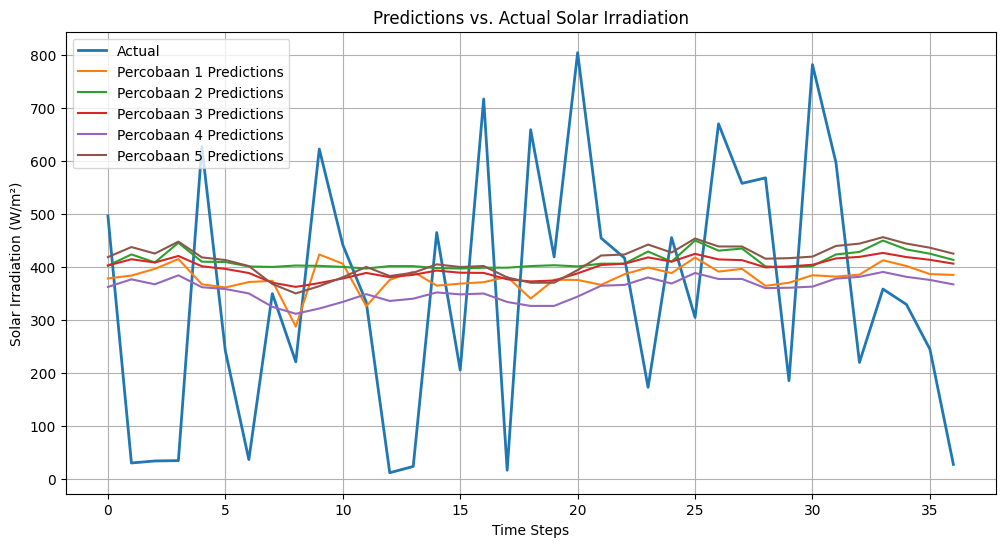

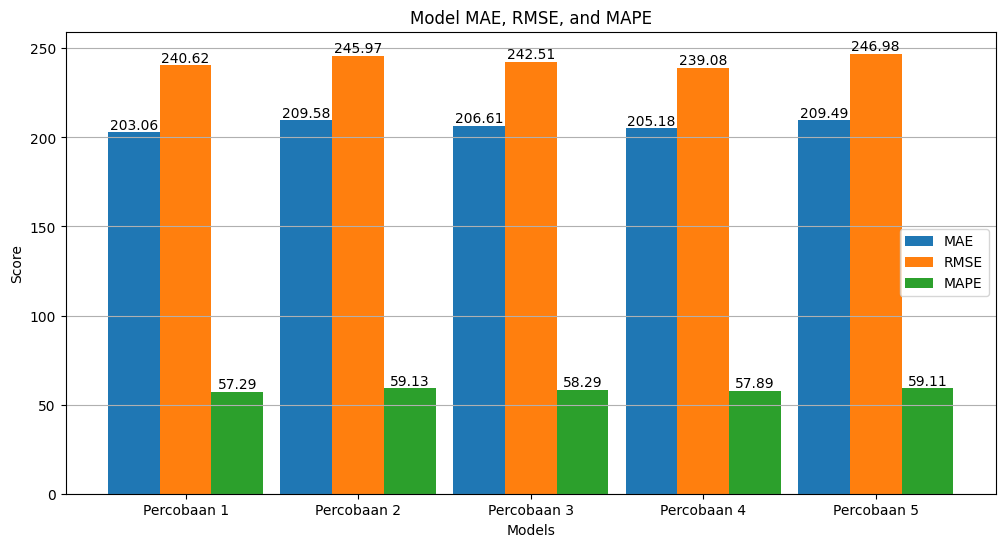

In [ ]:
# Contoh pemanggilan fungsi:
model_paths = {
    "Percobaan 1": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_adam_1.keras",
    "Percobaan 2": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_adam_2.keras",
    "Percobaan 3": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_adam_3.keras",
    "Percobaan 4": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_adam_4.keras",
    "Percobaan 5": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_adam_5.keras"
}
predict_and_plot(model_paths, x_test, y_test, scaler)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step


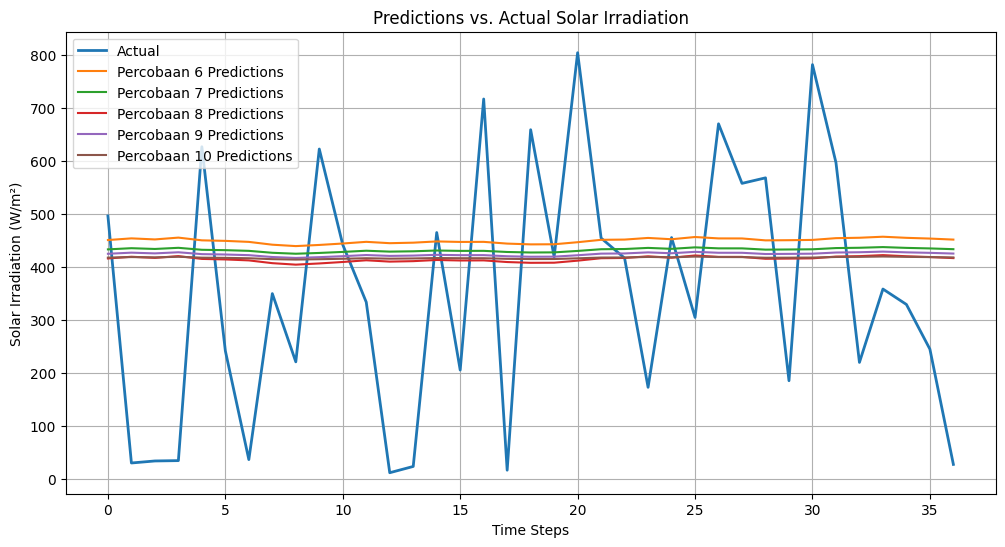

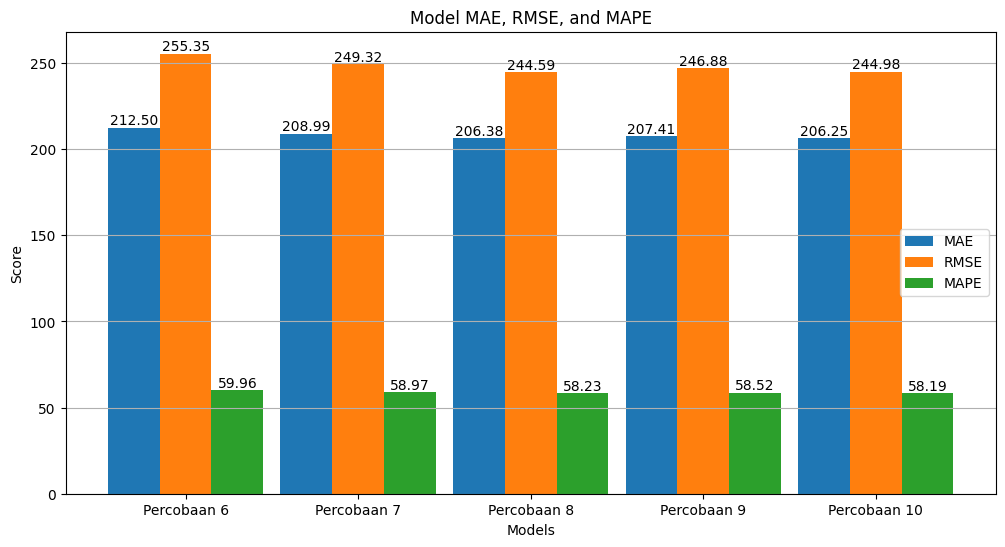

In [ ]:
# Contoh pemanggilan fungsi:
model_paths = {
    "Percobaan 6": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_sgd_1.keras",
    "Percobaan 7": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_sgd_2.keras",
    "Percobaan 8": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_sgd_3.keras",
    "Percobaan 9": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_sgd_4.keras",
    "Percobaan 10": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_sgd_5.keras"
}

predict_and_plot(model_paths, x_test, y_test, scaler)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 452ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step


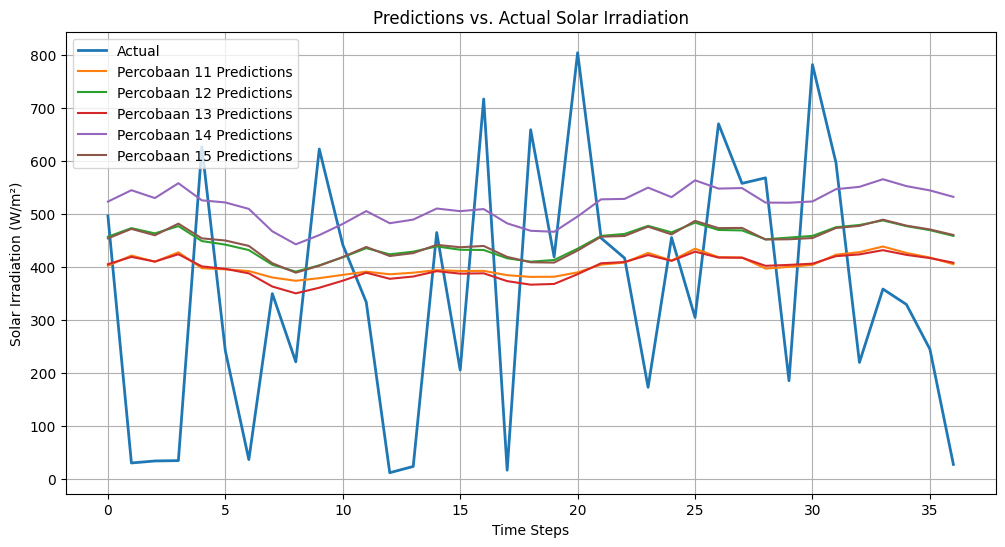

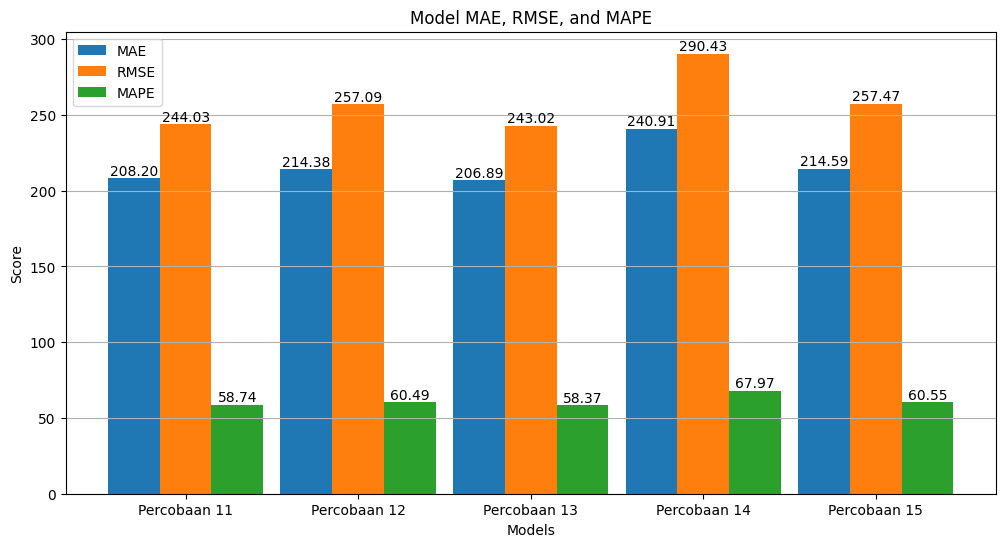

In [ ]:
# Contoh pemanggilan fungsi:
model_paths = {
    "Percobaan 11": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_rms_1.keras",
    "Percobaan 12": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_rms_2.keras",
    "Percobaan 13": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_rms_3.keras",
    "Percobaan 14": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_rms_4.keras",
    "Percobaan 15": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_rms_5.keras"
}

predict_and_plot(model_paths, x_test, y_test, scaler)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 446ms/step


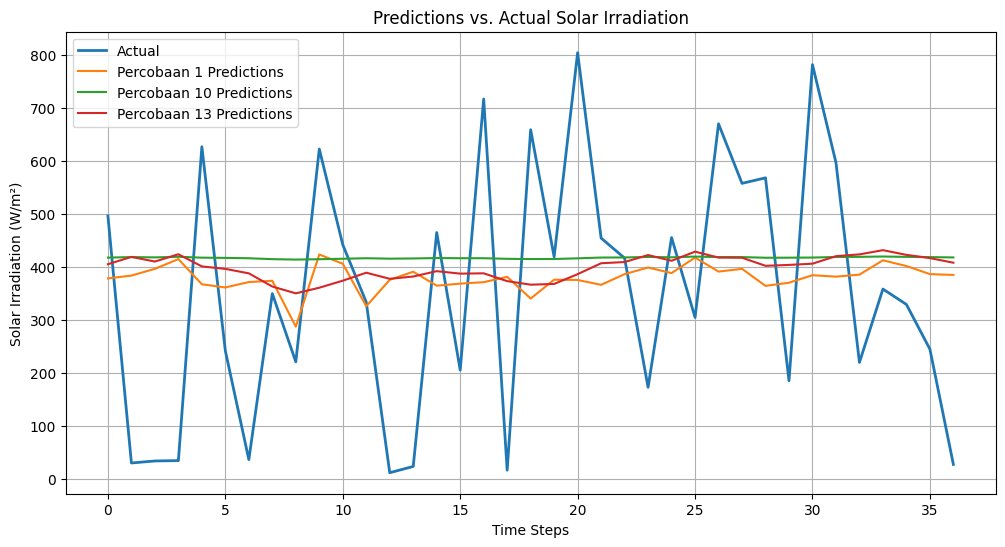

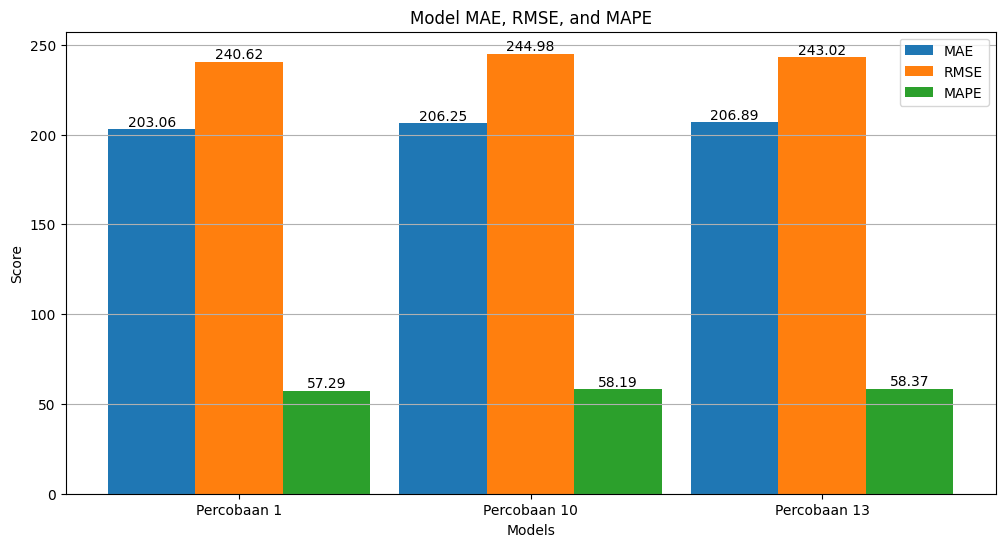

In [ ]:
# Contoh pemanggilan fungsi:
model_paths = {
    "Percobaan 1": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_adam_1.keras",
    "Percobaan 10": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_sgd_5.keras",
    "Percobaan 13": "/content/drive/MyDrive/Tugas Akhir/Model/LSTM/1/final_rms_3.keras",
}

predict_and_plot(model_paths, x_test, y_test, scaler)